# An Anaylsis of Childhood Vaccine Rates in the US
Christine Bailey

**Introduction
In this project, we will look at available CDC data on vaccines rates in the United States, from children aged 19-35 months. Vaccinations are an important way to protect the health of all citizens, and everyone who does not have a medical condition that prevents them from getting vaccines should be vaccinated. This helps to promote herd immunity, which protects all those who have medical exemptions and cannot be vaccinated.**

**More information on vaccines can be found here: https://www.vaccines.gov/**

**As the anti-vaccination movement seems to be gaining attention in the United States, we will look at government data to see if their movement is actually shifting the vaccination rates in the US.**

**We will look at the data to find the relationships between certain vaccines, and try to pinpoint any vaccines in particular that have declining rates, as well as to see if there is an overall decline in vaccination rates**

### Imports
To begin our project, we will need several libraries, as listed below:

 * Beautiful Soup
 * Requests
 * Numpy
 * Pandas
 * Matplotlib.pyplot
 * Seaborn
 * ScikitLearn
 * Scipy
You will also want to make sure that lxml is installed on your machine, as you will not be able to collect your data correctly without it.

If you are using a Jupyter notebook, open a new terminal and type ___pip install lxml___

In [1]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import requests as rq
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, feature_selection
from sklearn import linear_model, model_selection, metrics
from scipy import stats

### Scraping the web for data
Because the CDC has their data on seperate sites based by year, you will have to scrape multiple websites for the information you need. This is no big deal, however, as the process is very similar for both cases.

The two websites that we will be scraping are here:

* https://www.cdc.gov/mmwr/volumes/67/wr/mm6740a4.htm#modalIdString_CDCTable_0
* https://www.cdc.gov/mmwr/preview/mmwrhtml/mm6236a1.htm

We will only be looking at information from 2008-2017, but this project could easily be extended to include more years

First, we will get the data from the page. We will use Beautiful Soup to neaten up the html code retrieved, in order to find the tables that we need. Once we find the tables, we can read in the information and format it into a pandas dataframe.

In [2]:
url = 'https://www.cdc.gov/mmwr/volumes/67/wr/mm6740a4.htm'

#getting the website information in html format
resp = rq.get(url)
soup = bs(resp.text, 'html.parser')
soup.prettify()

#finding the table with the information and then creating the new dataframe
tables = soup.find_all('table')[0]
df = pd.read_html(str(tables))[0]

df.head()

,Vaccine/Dose,Survey year% (95% CI),Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0
,2013,2014,2015,2016,2017,Unnamed: 5_level_1
0,DTaP†,NaN,NaN,NaN,NaN,NaN
1,≥3 doses,94.1 (93.2–95.0),94.7 (94.0–95.4),95.0 (94.4–95.5),93.7 (92.8–94.5)§,94.0 (93.3–94.7)
2,≥4 doses,83.1 (81.8–84.3),84.2 (83.0–85.4),84.6 (83.5–85.7),83.4 (82.1–84.6),83.2 (82.0–84.3)
3,Poliovirus (≥3 doses),92.7 (91.6–93.6),93.3 (92.5–94.1),93.7 (93.0–94.3),91.9 (90.9–92.9)§,92.7 (91.9–93.5)
4,MMR (≥1 dose)¶,91.9 (90.9–92.7),91.5 (90.6–92.4),91.9 (91.0–92.7),91.1 (90.1–92.0),91.5 (90.6–92.3)


### Tidying the Data
As we can see, the data that we have collected is very messy. We will not be able to analyze it efficiently until we have neatened it up a bit. Thankfully, there doesn't seem to be much missing data, so all we are tasked with is cleaning it up a bit.

Our table has a MultiIndex, but we don't care about the first line of information, so our first task is to drop that section.

Our columns titles are misaligned with the actual information, so we will have to rename the columns to fit the actual data.

Then we will want to transpose our data, or switch the rows and columns, so that it will be easier for us to graph and analyze later. We will also add a new column holding the year information.

In [3]:
#dropping the multiindex
df.columns = df.columns.droplevel()

#renaming the columns
df.rename(columns={'2013':'Vaccine/Dose','2014':'2013','2015':'2014','2016':'2015','2017':'2016','Unnamed: 5_level_1':'2017'},inplace=True)

#transposing the data
df = df.T

#adding the year column
df['year'] = df.index

#resetting the index to number values
df.reset_index(drop=True,inplace=True)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,year
0,DTaP†,≥3 doses,≥4 doses,Poliovirus (≥3 doses),MMR (≥1 dose)¶,Hib,Primary series**,Full series**,HepB,≥3 doses,...,PCV,≥3 doses,≥4 doses,HepA,≥1 dose,≥2 doses§§,Rotavirus¶¶,Combined 7-vaccine series***,No vaccinations,Vaccine/Dose
1,NaN,94.1 (93.2–95.0),83.1 (81.8–84.3),92.7 (91.6–93.6),91.9 (90.9–92.7),NaN,93.7 (92.7–94.5),82.0 (80.7–83.3),NaN,90.8 (89.7–91.7),...,NaN,92.4 (91.4–93.3),82.0 (80.6–83.3),NaN,83.1 (81.9–84.3)§,54.7 (53.1–56.3),72.6 (71.1–74.0)§,70.4 (68.8–71.9),0.7 (0.5–1.1),2013
2,NaN,94.7 (94.0–95.4),84.2 (83.0–85.4),93.3 (92.5–94.1),91.5 (90.6–92.4),NaN,93.3 (92.5–94.1),82.0 (80.7–83.2),NaN,91.6 (90.7–92.4),...,NaN,92.6 (91.8–93.4),82.9 (81.6–84.2),NaN,85.1 (84.0–86.2)§,57.5 (55.9–59.1)§,71.7 (70.1–73.2),71.6 (70.2–73.1),0.8 (0.6–1.0),2014
3,NaN,95.0 (94.4–95.5),84.6 (83.5–85.7),93.7 (93.0–94.3),91.9 (91.0–92.7),NaN,94.3 (93.7–94.9),82.7 (81.5–83.8),NaN,92.6 (91.9–93.3),...,NaN,93.3 (92.5–94.0),84.1 (83.0–85.2),NaN,85.8 (84.7–86.8),59.6 (58.1–61.0),73.2 (71.8–74.6),72.2 (70.9–73.6),0.8 (0.6–1.0),2015
4,NaN,93.7 (92.8–94.5)§,83.4 (82.1–84.6),91.9 (90.9–92.9)§,91.1 (90.1–92.0),NaN,92.8 (91.8–93.6)§,81.8 (80.5–83.0),NaN,90.5 (89.3–91.5)§,...,NaN,91.8 (90.8–92.7)§,81.8 (80.4–83.1)§,NaN,86.1 (84.9–87.2),60.6 (59.1–62.2),74.1 (72.6–75.5),70.7 (69.2–72.2),0.8 (0.6–1.0),2016


### Tidying continued
Our table is looking better, but we still have some cleaning up to do. We want to get rid of the columns that only hold the vaccine name information, as well as change the names of some of the vaccines to reflect both the type of vaccine and the dosage.

Then we want our column names to be the vaccines/dosages and the year, instead of being numbers.

Our final task is to get rid of the confidence levels in parantheses next to the percentages, as they hinder our ability to plot our information, and then to change our data to numerical types, instead of strings.

In [4]:
#Renaming the vaccines to include both vaccine and dosage
df.at[0,1] = 'DTaP ≥3 doses'
df.at[0,2] = 'DTaP ≥4 doses'
df.at[0,6] = 'Hib Primary Series'
df.at[0,7] = 'Hib Full Series'
df.at[0,9] = 'HepB ≥3 doses'
df.at[0,10] = 'HepB Birth Dose'
df.at[0,13] = 'PCV ≥3 doses'
df.at[0,14] = 'PCV ≥4 doses'
df.at[0,16] = 'HepA ≥1 dose'
df.at[0,17] = 'HepA ≥2 doses'
df.at[0,'year'] = 'Year'

#Dropping the columns that only hold name information
df = df.drop(columns=[0,5,8,12,15])

#Switching the column names to be the vaccine information
df.columns = df.iloc[0]
df = df.reindex(df.index.drop(0))

#Removing data in paranthesis
for index, row in df.iterrows() :
    for x in range (0,16):
        row[x] = row[x][0:4]

#Making all data numerical data
df = df.astype(float)
df.Year = df.Year.astype(np.int64)

df.head()

,DTaP ≥3 doses,DTaP ≥4 doses,Poliovirus (≥3 doses),MMR (≥1 dose)¶,Hib Primary Series,Hib Full Series,HepB ≥3 doses,HepB Birth Dose,Varicella (≥1 dose)¶,PCV ≥3 doses,PCV ≥4 doses,HepA ≥1 dose,HepA ≥2 doses,Rotavirus¶¶,Combined 7-vaccine series***,No vaccinations,Year
1,94.1,83.1,92.7,91.9,93.7,82.0,90.8,74.2,91.2,92.4,82.0,83.1,54.7,72.6,70.4,0.7,2013
2,94.7,84.2,93.3,91.5,93.3,82.0,91.6,72.4,91.0,92.6,82.9,85.1,57.5,71.7,71.6,0.8,2014
3,95.0,84.6,93.7,91.9,94.3,82.7,92.6,72.4,91.8,93.3,84.1,85.8,59.6,73.2,72.2,0.8,2015
4,93.7,83.4,91.9,91.1,92.8,81.8,90.5,71.1,90.6,91.8,81.8,86.1,60.6,74.1,70.7,0.8,2016
5,94.0,83.2,92.7,91.5,92.8,80.7,91.4,73.6,91.0,91.9,82.4,86.0,59.7,73.2,70.4,1.1,2017


### Our second website
As I mentioned before, the CDC splits their data into many different websites, so to access the vaccine information from 2008-2012, we will have to repeat the process from above on the seperate website.

This website is a bit older, so the data is formatted slightly differently. So while we will follow the same process as above, the rows and columns we change will be slightly different.

A good way to make sure that you are formatting the right information is to view the new table at each step of your process, so you know exaclty which column or row to target. Make sure that the columns are titled exactly the same thing so that when we finally merge our two dataframes, the data can be grouped together correctly.

Our end result is shown below.

In [5]:
#Scraping the web for data
url2 = 'https://www.cdc.gov/mmwr/preview/mmwrhtml/mm6236a1.htm'

resp1 = rq.get(url2)
soup1 = bs(resp1.text, 'html.parser')
soup1.prettify()

#Finding the data from the html
tables1 = soup1.find_all('table')[0]

df1 = pd.read_html(str(tables1))[0]

#Dropping all unnecessary rows and columns
df1 = df1.drop(columns=[2,4,6,8,10])
df1 = df1.drop([0,1,25])
df1 = df1.T
df1.reset_index(drop=True,inplace=True)

#Changing vaccine names to include both vaccines and dosages
df1.at[0,4] = 'DTaP ≥3 doses'
df1.at[0,5] = 'DTaP ≥4 doses'
df1.at[0,6] = 'Poliovirus (≥3 doses)'
df1.at[0,7] = 'MMR (≥1 dose)¶'
df1.at[0,9] = 'Hib Primary Series'
df1.at[0,10] = 'Hib Full Series'
df1.at[0,12] = 'HepB ≥3 doses'
df1.at[0,13] = 'HepB Birth Dose'
df1.at[0,14] = 'Varicella (≥1 dose)¶'
df1.at[0,16] = 'PCV ≥3 doses'
df1.at[0,17] = 'PCV ≥4 doses'
df1.at[0,19] = 'HepA ≥1 dose'
df1.at[0,20] = 'HepA ≥2 doses'
df1.at[0,21] = 'Rotavirus¶¶'
df1.at[0,23] = 'Combined 7-vaccine series***'
df1.at[0,24] = 'No vaccinations'

#Dropping the columns only holding name information
df1 = df1.drop(columns=[2,3,8,11,15,18,22])

#Making the vaccine information the column titles
df1.columns = df1.iloc[0]
df1 = df1.reindex(df1.index.drop(0))

#adding our year column
df1['Year'] = [2008,2009,2010,2011,2012]

#making our data numerical
df1 = df1.astype(float)
df1.Year = df1.Year.astype(np.int64)

df1.head()

,DTaP ≥3 doses,DTaP ≥4 doses,Poliovirus (≥3 doses),MMR (≥1 dose)¶,Hib Primary Series,Hib Full Series,HepB ≥3 doses,HepB Birth Dose,Varicella (≥1 dose)¶,PCV ≥3 doses,PCV ≥4 doses,HepA ≥1 dose,HepA ≥2 doses,Rotavirus¶¶,Combined 7-vaccine series***,No vaccinations,Year
1,96.2,84.6,93.6,92.1,NaN,NaN,93.5,55.3,90.7,92.8,80.1,70.5,40.4,NaN,NaN,0.6,2008
2,95.0,83.9,92.8,90.0,92.1,54.8,92.4,60.8,89.6,92.6,80.4,75.0,46.6,43.9,44.3,0.6,2009
3,95.0,84.4,93.3,91.5,92.2,66.8,91.8,64.1,90.4,92.6,83.3,78.3,49.7,59.2,56.6,0.7,2010
4,95.5,84.6,93.9,91.6,94.2,80.4,91.1,68.6,90.8,93.6,84.4,81.2,52.2,67.3,68.5,0.8,2011
5,94.3,82.5,92.8,90.8,93.3,80.9,89.7,71.6,90.2,92.3,81.9,81.5,53.0,68.6,68.4,0.8,2012


### Combining and visualizing our data
Now that we have our data formatted the same way, we can combine them into one beautiful dataset! Once again, it is imperative that the column names are ___exactly___ the same, otherwise your data will not be merged properly

Once our data is combined, we will plot a simple line graph to see if we notice any trends with the vaccination rates over the years. We can also plot the percentage of people abstaining from vaccinating their children to see if there are any trends.

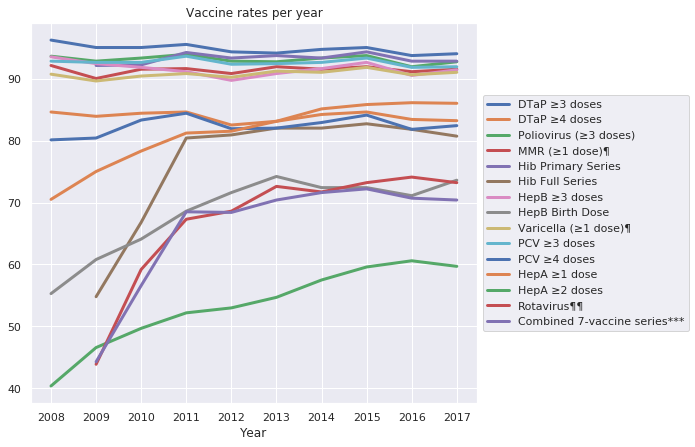

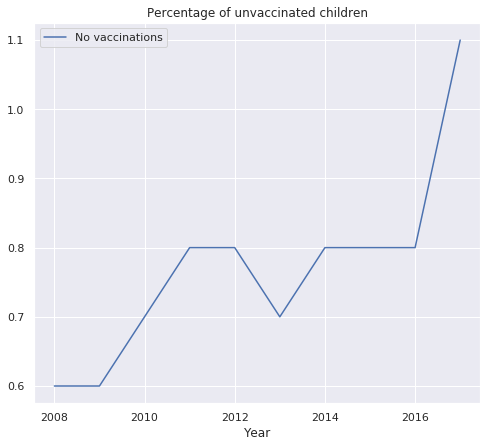

In [6]:
#Combining the datasets
vacc = pd.concat([df1,df])

#setting the size and color sceme of plots
plt.rcParams['figure.figsize'] = [8, 7]
sns.set(color_codes=True)
fig = plt.figure

#plotting the vaccines per year(without rates of no vaccines)
ax = vacc.loc[:,df.columns != 'No vaccinations'].plot(x='Year', 
                        xticks=vacc.Year,linewidth=3)
#moves legend to outside of graph
ax.legend(loc='center left', bbox_to_anchor = (1,.5))
ax.set_title('Vaccine rates per year')

#Plotting the rate of no vaccines per year
vacc.plot(x='Year',y='No vaccinations',title='Percentage of unvaccinated children')

### More Analysis
From the first graph we made, it looks like in general the rate of vaccinations seems to be either incresing or remaining the same. At the same time, however, the rate of unvaccinated children has been increasing. It might be worthwhile to do some more in depth anaylsis.

Many of the vaccines listed are required for kindergarten in the US, such as DTaP, MMR, Polio, Hep B, and Varicella. Let's take a look at these vaccines in particular to see if there is any relation between their rates.

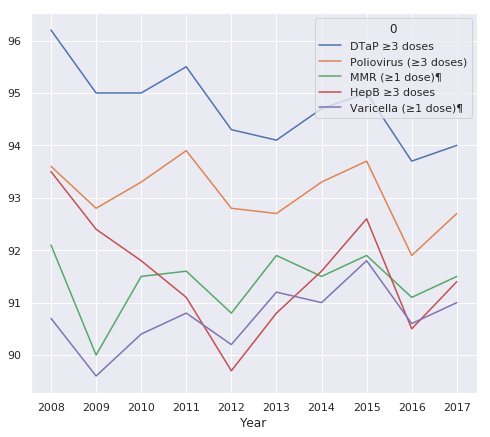

In [7]:
#Getting a new dataframe with only school vaccines
school_vacc = vacc[['DTaP ≥3 doses','Poliovirus (≥3 doses)',
                   'MMR (≥1 dose)¶','HepB ≥3 doses','Varicella (≥1 dose)¶','Year']]

#plotting vaccines across time
school_vacc.plot(x='Year', xticks=school_vacc.Year)

### Visualization and Machine Learning
the graph we made, there seems to be a very clear relationship between all of the school required vaccines, which would make sense. If you are willing to skip one of the required vaccines, you would be more likely to also skip the other required ones.

DTaP and the Poliovirus seem to be almost identical in thier shape, let's visualize these ones more to see if there is a trend.

Once we have visualized them, we can try to fit a model to our data to see if we can predict any future results. We will do that using scikit-learn's library. More information can be found here : https://scikit-learn.org/stable/modules/linear_model.html

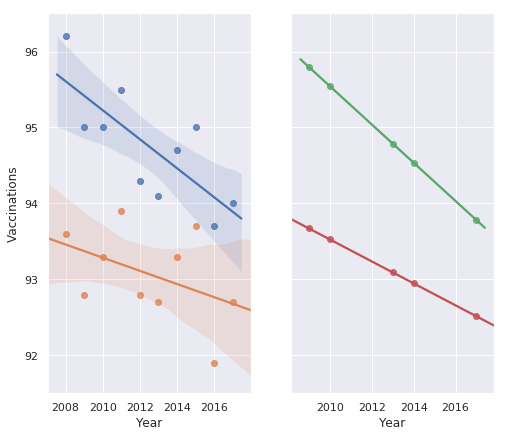

In [21]:
#create 2 subplots side by side that share the same y axis
fig, (ax1,ax2) = plt.subplots(ncols=2, sharey= True)

#use seaborn library to plot a regression line
g = sns.regplot(x='Year',y='DTaP ≥3 doses',data=school_vacc,ax=ax1)
g = sns.regplot(x='Year',y='Poliovirus (≥3 doses)',data=school_vacc, ax=ax1)
#Set y label that both graphs will share
g.set_ylabel('Vaccinations')

#reshape your values so that they can be used in regression
x = school_vacc['Year'].values.reshape(-1,1)
y = school_vacc[['DTaP ≥3 doses','Poliovirus (≥3 doses)']].values

#split your data into train and test sets to avoid overfitting
xtrn, xtst, ytrn, ytst = model_selection.train_test_split(x,y,test_size=.5)

#generate polynomial and interaction features
poly = preprocessing.PolynomialFeatures(interaction_only = True, include_bias = False)
ypoly = poly.fit_transform(ytrn)

#fit your preprocessed feature matrix with a linear regression model
clf = linear_model.LinearRegression()
clf.fit(xtrn,ypoly)
newy = clf.predict(xtst)

#plot the new predicted linear regressions for the vaccines
h = sns.regplot(x=xtst,y=newy[:,0],ax=ax2)

# Set xlabel for regression graph
h.set_xlabel('Year')
h = sns.regplot(x=xtst,y=newy[:,1],ax=ax2)

From our plots we can see a clear downward trend over time. Even our regression plots seem to reflect this result. However, we do not know if this is significant. We have to perform statistical tests to see if there actually is a relationship.

First we will perform a R^2 test to test the correlation. If our value is close to 1, we will be able to conclude that there is a correlation.

In [22]:
#only DTaP data
y_pred1 = clf.predict(x)[:,0]
y_true1 = y[:,0]

#only Polio data
y_pred2 = clf.predict(x)[:,1]
y_true2 = y[:,1]

#both considered
y_pred = clf.predict(x)[:, [0,1]]
y_true = y

#finding the r^2 values
dtap_rscore = metrics.r2_score(y_true1, y_pred1)
polio_rscore = metrics.r2_score(y_true2, y_pred2)

both_rscore =metrics.r2_score(y_true, y_pred,
                              multioutput='variance_weighted')

print("DTaP r^2 is: ",dtap_rscore)
print("Polio r^2 is: ",polio_rscore)
print("Combined r^2 is: ",both_rscore)

#using univariate linear regression test to find p values
fscores, pvals = feature_selection.f_regression(y,x.ravel(),center=True)

print("DTaP pvalue is: ",pvals[0])
print("Polio pvalue is: ",pvals[1])

DTaP r^2 is:  0.471894519762
Polio r^2 is:  0.0769491537868
Combined r^2 is:  0.318680525181
DTaP pvalue is:  0.010019096712
Polio pvalue is:  0.207907539417


### Result of Statistics
None of our r^2 values were too convincing. The polio and combined vaccination r^2 values were too low to even consider a correlation with them and time, but our DTaP value was too high to immediately reject a correlation.

After performing our test to find our p-values, we can see that indeed our hypothesis that the Polio vaccination was correlated with time can be rejected as our p-value was .208, which is far too high to assume significance.

However, we can accept our hypothesis that the DTaP vaccine is correlated with time as our p-value is .01, which is well within the threshold of significance (typically .05 is used as the barrier value).

Even though the results of our significance tests gave us promising results, we cannot immediately accept them as we only have 10 values that we are testing. For a greater level of confidence, we would have to increase our sample size.

###  Further testing
Now that we have results on how the specific vaccines are correlated, lets take a look at the data we have on those who abstained from vaccinations to see if those numbers are significantly changing over time.

We will follow the same process as above, but with our 'no vaccination' data instead.

The only difference is that we cannot do the f-test on our data as we do not have multiple samples that we are comparing against each other. Instead we will use the pearson's correlation test. more information on this test can be found here: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html

No vaccination r^2 is:  0.815162686785
No vaccination pvalue is:  0.00405890628267


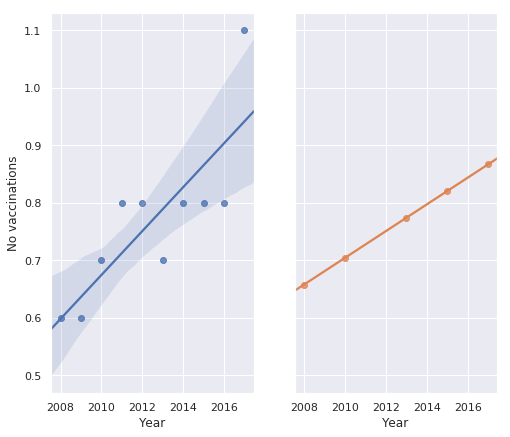

In [23]:
#creating 2 side by side plots that share the same y axis
fig, (ax1,ax2) = plt.subplots(ncols=2, sharey = True)

#our year and vaccination data
x_no_vacc = vacc['Year'].values.reshape(-1,1)
y_no_vacc = vacc['No vaccinations'].values

#plotting the rate of no vaccinations with a regression line
sns.regplot(x='Year',y='No vaccinations',data=vacc,ax=ax1)

#splitting our data into training and testing data
xtrn,xtst,ytrn,ytst = model_selection.train_test_split(x_no_vacc,y_no_vacc,
                                                      test_size=.5)

#using a linear regression model
regr = linear_model.LinearRegression()
regr.fit(xtrn,ytrn)

#plotting the predicted rates using the model
g = sns.regplot(xtst,regr.predict(xtst),ax=ax2)
g.set_xlabel('Year')

#calculating the correlation coefficient (r^2) and the p value
pearsons, pval = stats.pearsonr(vacc.Year,y_no_vacc)

print("No vaccination r^2 is: ", pearsons)
print("No vaccination pvalue is: ", pval)

## Conclusion
Our r^2 value from the no vaccination data is .815, which is quite close to 1. Even without finding the p-value, we could pretty confidently say that there is a positive relationship with the number of children not being vaccinated and time. But we found the p value anyway.

Our p value is very low, at around .004, which means that our suspiscion was correct. With such a low p value, we can quite confidently reject the null hypothesis that there is no relation between lack of vaccinations and time, and accept our hypothesis that there is a relationship.

The same caveat that applied with the other test applies here too however. Our sample size is still very small, so there is still the possiblity that our data is not significant. But that doesn't mean that we should reject our results. Until more data is gathered, we can still accept what we have now.

## Overall thoughts
We found that the relationship between certain vaccines, such as DTaP and Polio are not tied specifically together, but that the Polio vaccination rates did seem to significantly decrease over time. Along with the specific vaccinations, we also found that the rates of children not receiving vaccinations seemed to be significantly increasing over time.

Does this mean that the anti-vaccination movement is actually affecting the US public? We can't know for sure what the actual cause is, but we can say that there is something out there that seems to be changing parents' minds.

It seems to be a worthwhile effort to continue to monitor CDC data over time to see if the trend continues. I think that it would also be interesting to bring in other demographic data to see if there is a correlation between people's backgrounds and social standings to if they choose to vaccinate their children.

If you are interested in investigating more data on vaccination rates, the CDC website has many resources to look into: https://www.cdc.gov/vaccines/imz-managers/coverage/childvaxview/index.html

And if any of the machine learning or statistic tests pique your interest, I would recommend looking at these resources:

* https://scikit-learn.org/stable/
* https://docs.scipy.org/doc/scipy/reference/stats.html
* https://cyfar.org/types-statistical-tests